In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [152]:
df = pd.read_csv("customer_tip.csv")

In [153]:
pwd

'C:\\Users\\vimal'

In [154]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# central tendancy

In [5]:
mean_tb=df["total_bill"].mean()
median_tb=df["total_bill"].median()
mode_tb=df["total_bill"].mode()[0]

In [6]:
print(mean_tb,median_tb,mode_tb)

19.78594262295082 17.795 13.42


In [7]:
print(mode_tb)

13.42


# measure of spread 

In [8]:
min_tb=df['total_bill'].min
max_tb=df['total_bill'].max
min_tb()


3.07

In [9]:
max_tb()

50.81

In [10]:
range_tb = max_tb()-min_tb()

In [11]:
range_tb

47.74

In [12]:

q1=df["total_bill"].quantile(0.25)
q2=df["total_bill"].quantile(0.5)
q3=df["total_bill"].quantile(0.75)
print(q1)
print(q2)
print(q3)


13.3475
17.795
24.127499999999998


In [13]:
IQR=q3-q1
IQR

10.779999999999998

In [14]:
var_tb=df["total_bill"].var()
var_tb

79.25293861397826

In [15]:
std_tb=np.sqrt(var_tb)
std_tb

8.902411954856856

In [16]:
skew_tb=df["total_bill"].skew()
kurt_tb=df["total_bill"].kurt()

In [17]:
skew_tb

1.1332130376158205

In [18]:
kurt_tb

1.2184840156638854

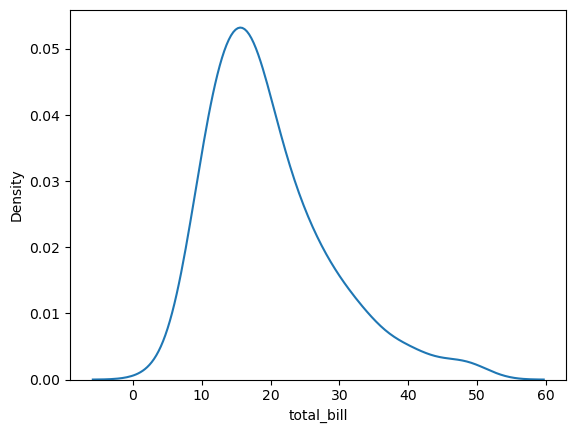

In [19]:
sns.kdeplot(data=df,x="total_bill")
plt.show()

In [155]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [21]:
 df.cov()

C:\Users\vimal\AppData\Local\Temp\ipykernel_20156\2820777847.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


C:\Users\vimal\AppData\Local\Temp\ipykernel_20156\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


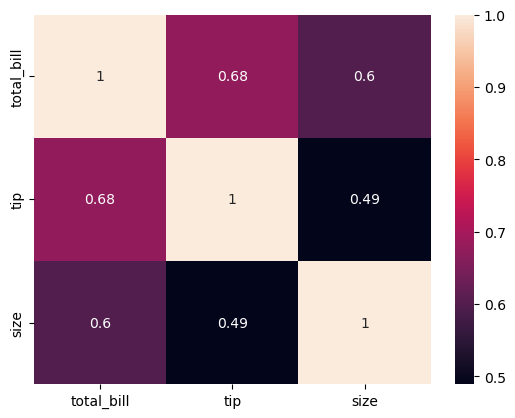

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# handling categorical data

In [156]:
df["sex_1"]=df["sex"].map({"Female":0,"Male":1})
df["sex_1"]

0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex_1, Length: 244, dtype: int64

In [24]:
df["sex_2"] = df["sex"].replace({"Female":0,"Male":1})
df["sex_2"]



0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex_2, Length: 244, dtype: int64

In [25]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_1,sex_2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


In [157]:
from sklearn.preprocessing import LabelEncoder

In [27]:
LE =LabelEncoder()

In [158]:
df["day_le"]=LE.fit_transform(df["day"])
df["day_le"]

0      2
1      2
2      2
3      2
4      2
      ..
239    1
240    1
241    1
242    1
243    3
Name: day_le, Length: 244, dtype: int32

In [29]:
df["day_le"].unique()

array([2, 1, 3, 0])

In [30]:
df["day"].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [160]:
pd.get_dummies(df["day"])

,Fri,Sat,Sun,Thur
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
239,0,1,0,0
240,0,1,0,0
241,0,1,0,0
242,0,1,0,0


In [162]:
df["day"].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

# scaling

# Standardization -zscore scaling

In [33]:
from sklearn.preprocessing import StandardScaler


In [34]:
ss=StandardScaler

In [178]:
df["ZTB"]=ss.fit_transform(df[["total_bill"]].values.reshape(-1,1))
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_1,day_le,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,1,2,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,1,2,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,1,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2,0.540745


In [179]:
df['total_bill'].skew()

1.1332130376158205

In [180]:
df["ZTB"].skew()

1.1332130376158205

In [181]:
df['total_bill'].kurt()

1.2184840156638854

In [182]:
df["ZTB"].kurt()

1.2184840156638836

<Axes: xlabel='total_bill', ylabel='Density'>

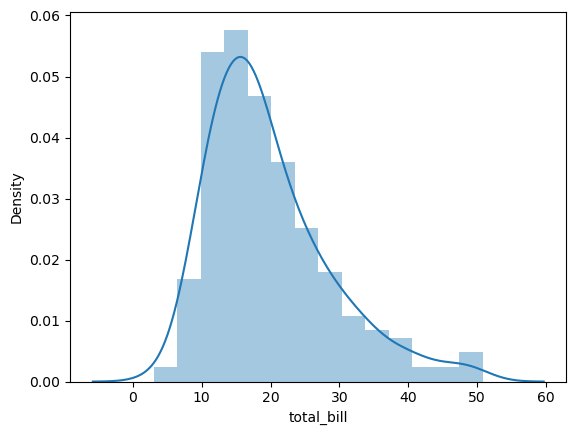

In [183]:
sns.distplot(df["total_bill"])

<Axes: xlabel='ZTB', ylabel='Density'>

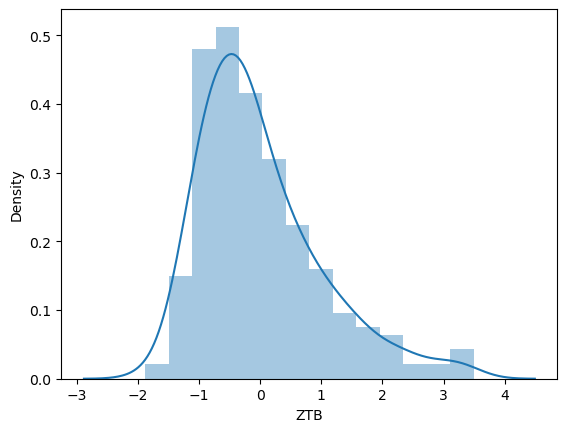

In [184]:
sns.distplot(df["ZTB"])

# Normalization - minmax scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
MM = MinMaxScaler()

In [185]:
df["MMTB"] =MM.fit_transform(df[["total_bill"]])

In [45]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_1,sex_2,day_le,ZTB,MMTB
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2,-0.314711,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2,-1.063235,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2,0.137780,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2,0.438315,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2,0.540745,0.450775


In [46]:
df["MMTB"].min()

0.0

In [47]:
df["MMTB"].max()

0.9999999999999999

In [48]:
df["MMTB"].skew()

1.1332130376158203

In [49]:
df["total_bill"].skew()

1.1332130376158205

In [50]:
df["MMTB"].kurt()

1.2184840156638836

In [51]:
df["total_bill"].kurt()

1.2184840156638854

<Axes: xlabel='MMTB', ylabel='Density'>

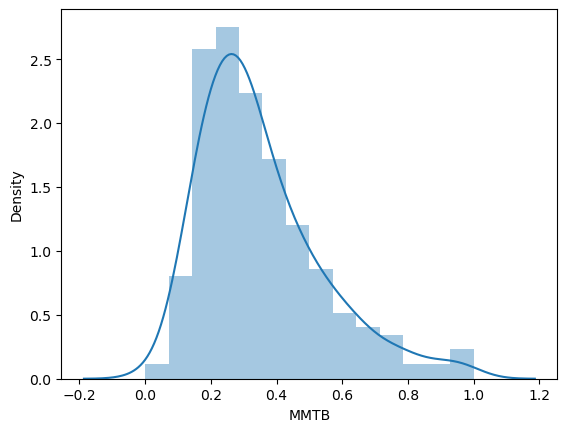

In [186]:
sns.distplot(df["MMTB"])

C:\Users\vimal\AppData\Local\Temp\ipykernel_20156\2943580123.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_bill"])


<Axes: xlabel='total_bill', ylabel='Density'>

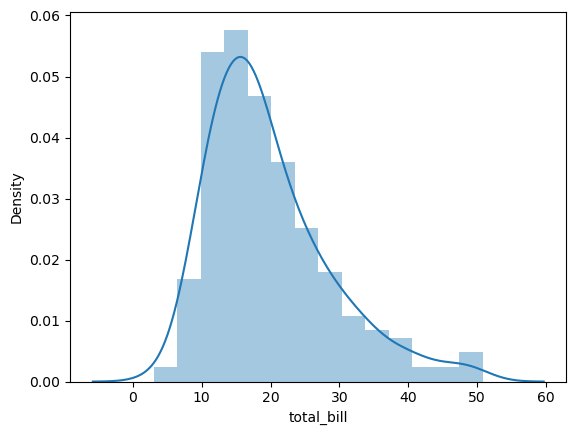

In [53]:
sns.distplot(df["total_bill"])

# Transformations

1.square root

2.log

In [187]:
df["sqrt_tb"] = np.sqrt(df["total_bill"])
df["log_tb"]=np.log(df["total_bill"])

In [188]:

df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_1,day_le,ZTB,MMTB,sqrt_tb,log_tb
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2,-0.314711,0.291579,4.121893,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,1,2,-1.063235,0.152283,3.215587,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,1,2,0.137780,0.375786,4.583667,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,1,2,0.438315,0.431713,4.866210,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2,0.540745,0.450775,4.958831,3.202340


In [56]:
print("sqewness of original data",df["total_bill"].skew())
print("sqewness of sqrt data",df["sqrt_tb"].skew())
print("sqewness of log data",df["log_tb"].skew())

sqewness of original data 1.1332130376158205
sqewness of sqrt data 0.5661281592596766
sqewness of log data -0.11623079290253824


In [57]:
print("kurutosis of original data",df["total_bill"].kurt())
print("kurutosis of sqrt data",df["sqrt_tb"].kurt())
print("kurutosis of log data",df["log_tb"].kurt())

kurutosis of original data 1.2184840156638854
kurutosis of sqrt data 0.19520953466627722
kurutosis of log data 0.4734793671474513


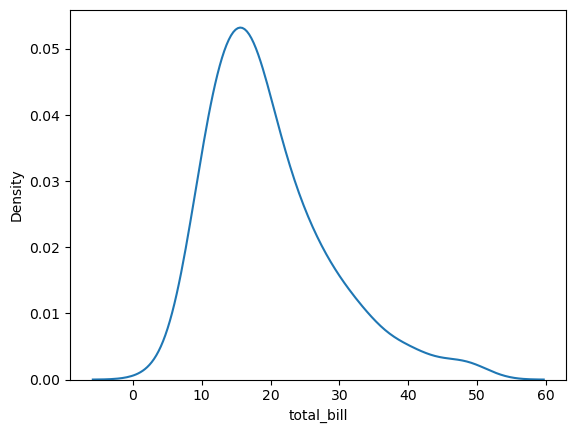

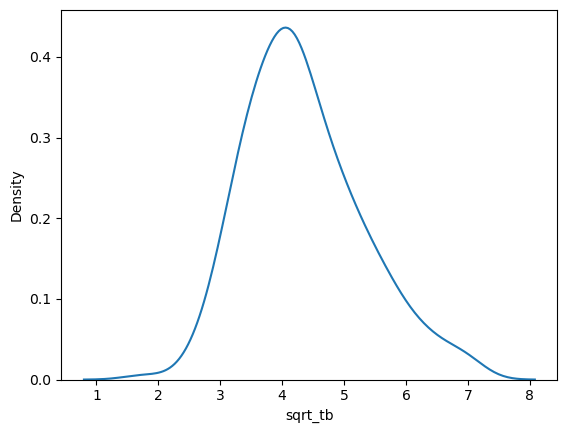

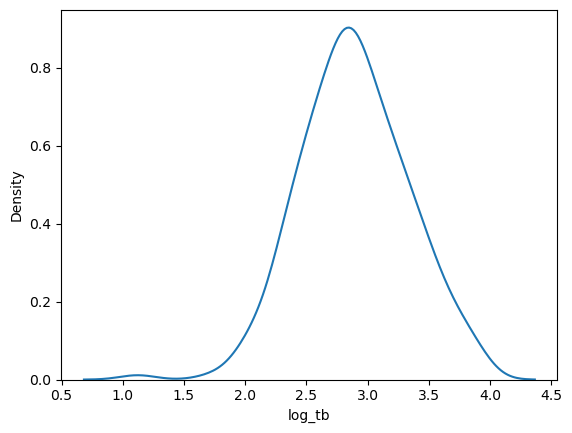

In [58]:
sns.kdeplot(data=df,x=df["total_bill"])
plt.show()
sns.kdeplot(data=df,x=df["sqrt_tb"])
plt.show()
sns.kdeplot(data=df,x=df["log_tb"])
plt.show()



# Univariate analysis

Numerical Data

 1.Histogram
 
 2.Density / KDEplot
 
 3.Boxplot
 
 4.Violinplot

<Axes: ylabel='Frequency'>

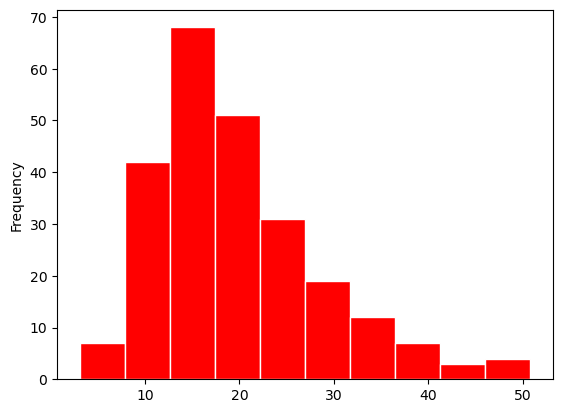

In [59]:
df["total_bill"].plot(kind="hist",color = "red",edgecolor = "white")

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

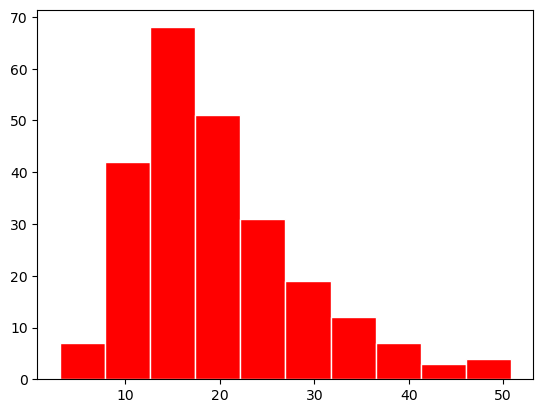

In [60]:
plt.hist(df["total_bill"],color ="red",edgecolor = "white")

In [61]:
df.shape

(244, 14)

<Axes: xlabel='total_bill', ylabel='Density'>

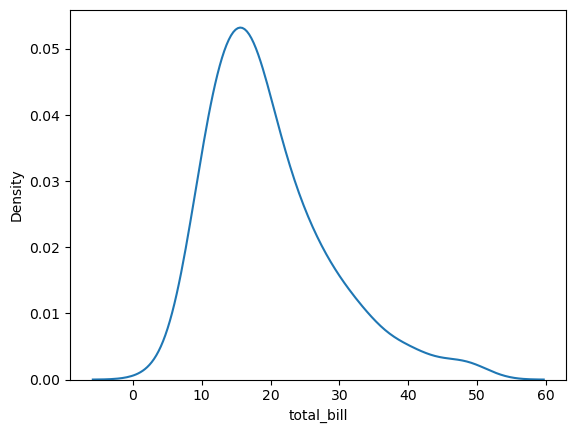

In [62]:
sns.kdeplot(df["total_bill"])

<Axes: xlabel='total_bill', ylabel='Density'>

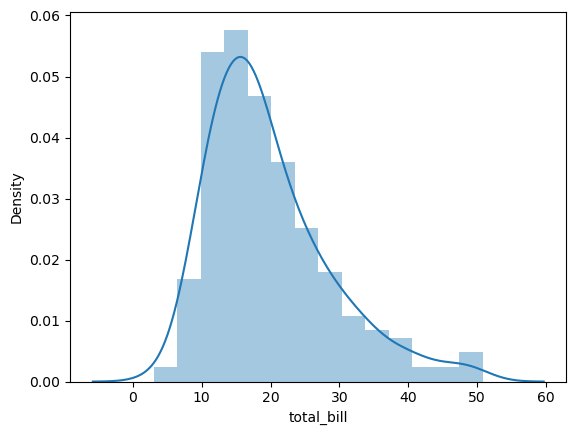

In [189]:
sns.distplot(df["total_bill"])

<Axes: xlabel='total_bill'>

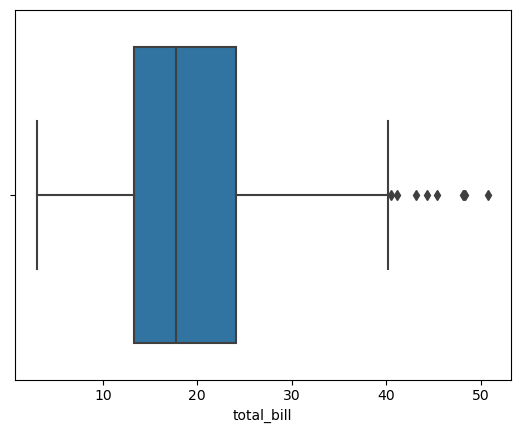

In [64]:
sns.boxplot(data=df,x="total_bill")

<Axes: xlabel='total_bill'>

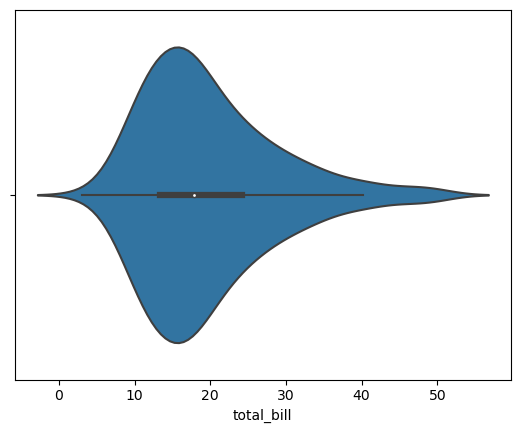

In [65]:
sns.violinplot(data=df,x="total_bill")

# categorical 

 1.Bargraph
 
 2.pie chart

In [66]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<Axes: >

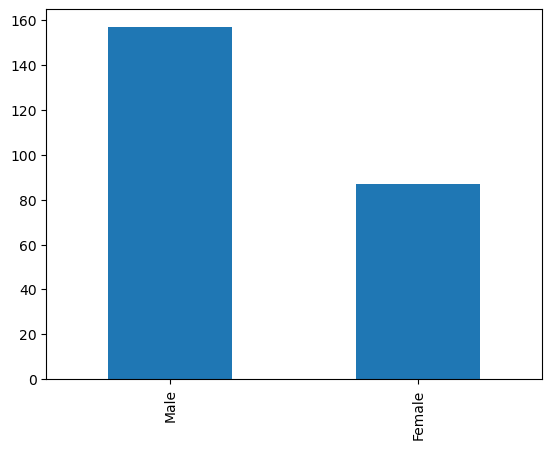

In [192]:
df["sex"].value_counts().plot(kind="bar")

<Axes: xlabel='sex', ylabel='count'>

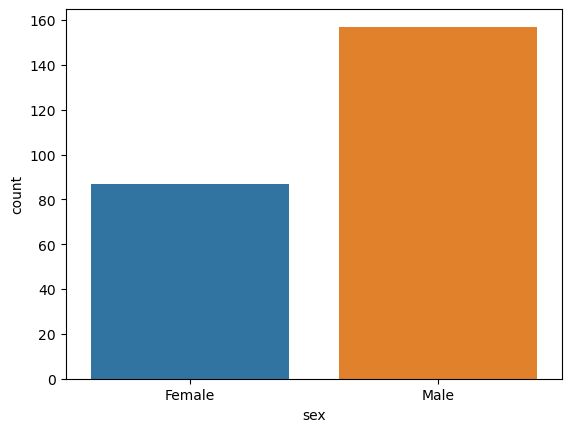

In [68]:
sns.countplot(data=df,x="sex")

<Axes: ylabel='sex'>

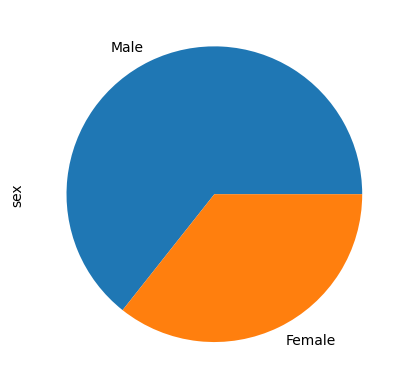

In [69]:
df["sex"].value_counts().plot(kind="pie")

<Axes: ylabel='sex'>

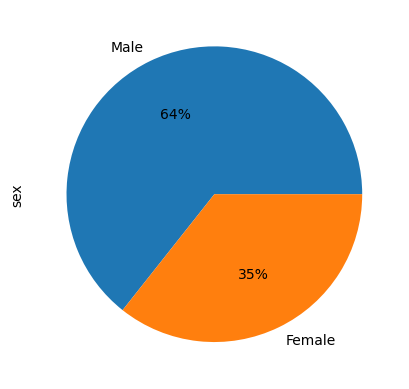

In [70]:
df["sex"].value_counts().plot(kind="pie",autopct="%1.i%%" )

<Axes: ylabel='sex'>

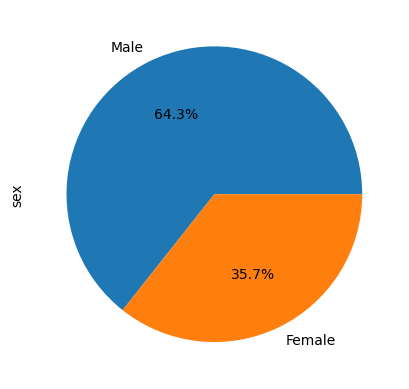

In [71]:
df["sex"].value_counts().plot(kind="pie",autopct="%1.1f%%" )

<Axes: ylabel='sex'>

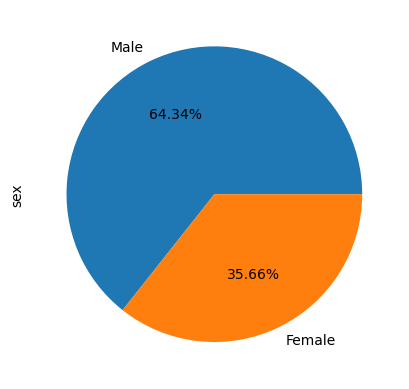

In [194]:
df["sex"].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: ylabel='sex'>

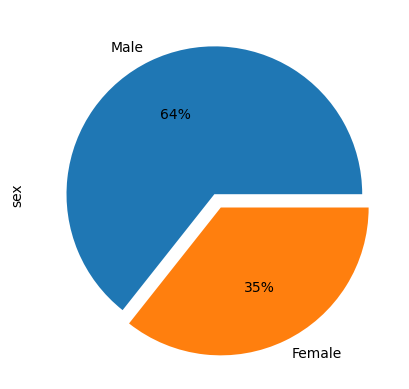

In [73]:
df["sex"].value_counts().plot(kind="pie",autopct="%1.i%%",explode=[0,0.1] )

C:\Users\vimal\AppData\Local\Temp\ipykernel_20156\3142933612.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()>0.8,annot=True)


<Axes: >

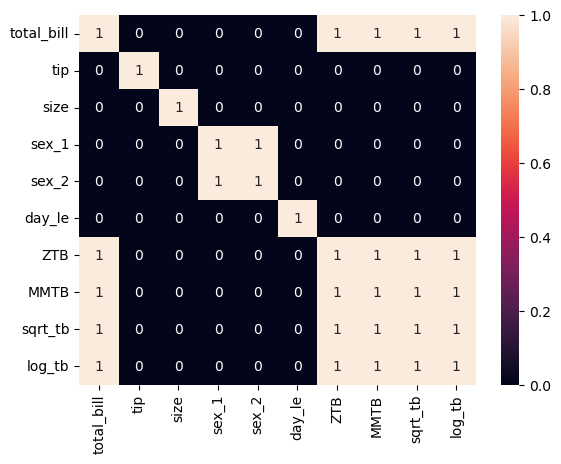

In [74]:
sns.heatmap(df.corr()>0.8,annot=True)

# Bivariate graph
 
 1.Line plot
 
 2.Scatter plot
 
 3.LM plot
 
 4.Heatmap
 
 5.pairplot

# Find relation between avg total bill paid W.R.T different size using graph

In [75]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_1,sex_2,day_le,ZTB,MMTB,sqrt_tb,log_tb
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2,-0.314711,0.291579,4.121893,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2,-1.063235,0.152283,3.215587,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2,0.137780,0.375786,4.583667,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2,0.438315,0.431713,4.866210,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2,0.540745,0.450775,4.958831,3.202340


In [76]:
df.groupby(df["size"])["total_bill"].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

<Axes: xlabel='size'>

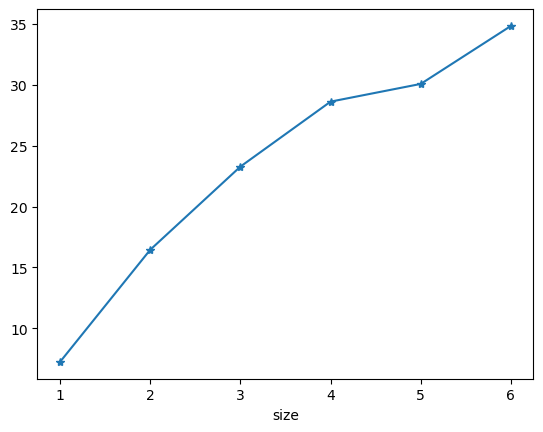

In [77]:
df.groupby(df["size"])["total_bill"].mean().plot(kind="line",marker="*")

<Axes: xlabel='total_bill', ylabel='tip'>

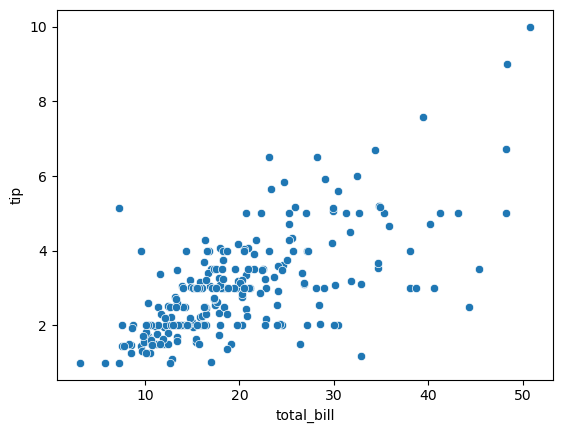

In [78]:
sns.scatterplot(data=df,x="total_bill",y="tip")

# incase for multivariate use hue:

<Axes: xlabel='total_bill', ylabel='tip'>

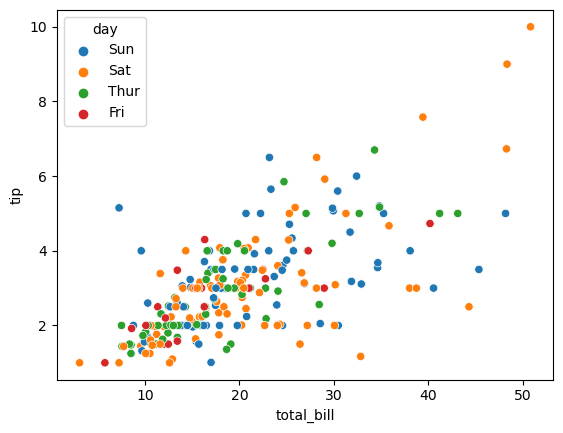

In [79]:
sns.scatterplot(data=df,x="total_bill",y="tip",hue="day")

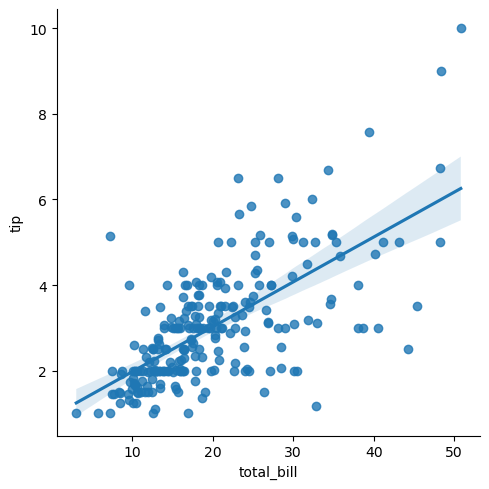

In [80]:
#linear model plot
sns.lmplot(data=df,x="total_bill",y="tip")

In [81]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_1,sex_2,day_le,ZTB,MMTB,sqrt_tb,log_tb
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2,-0.314711,0.291579,4.121893,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2,-1.063235,0.152283,3.215587,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2,0.137780,0.375786,4.583667,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2,0.438315,0.431713,4.866210,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2,0.540745,0.450775,4.958831,3.202340


C:\Users\vimal\AppData\Local\Temp\ipykernel_20156\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

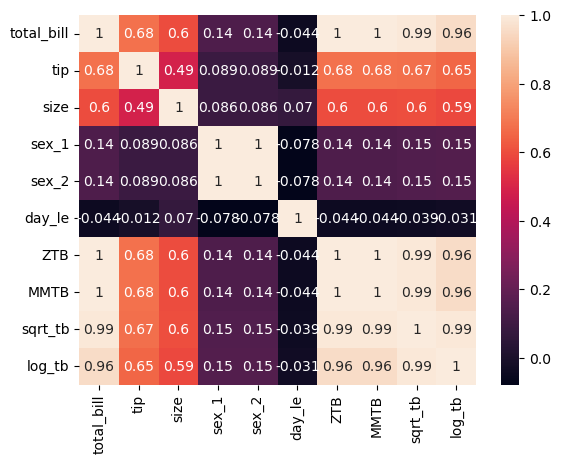

In [82]:
sns.heatmap(df.corr(),annot=True)

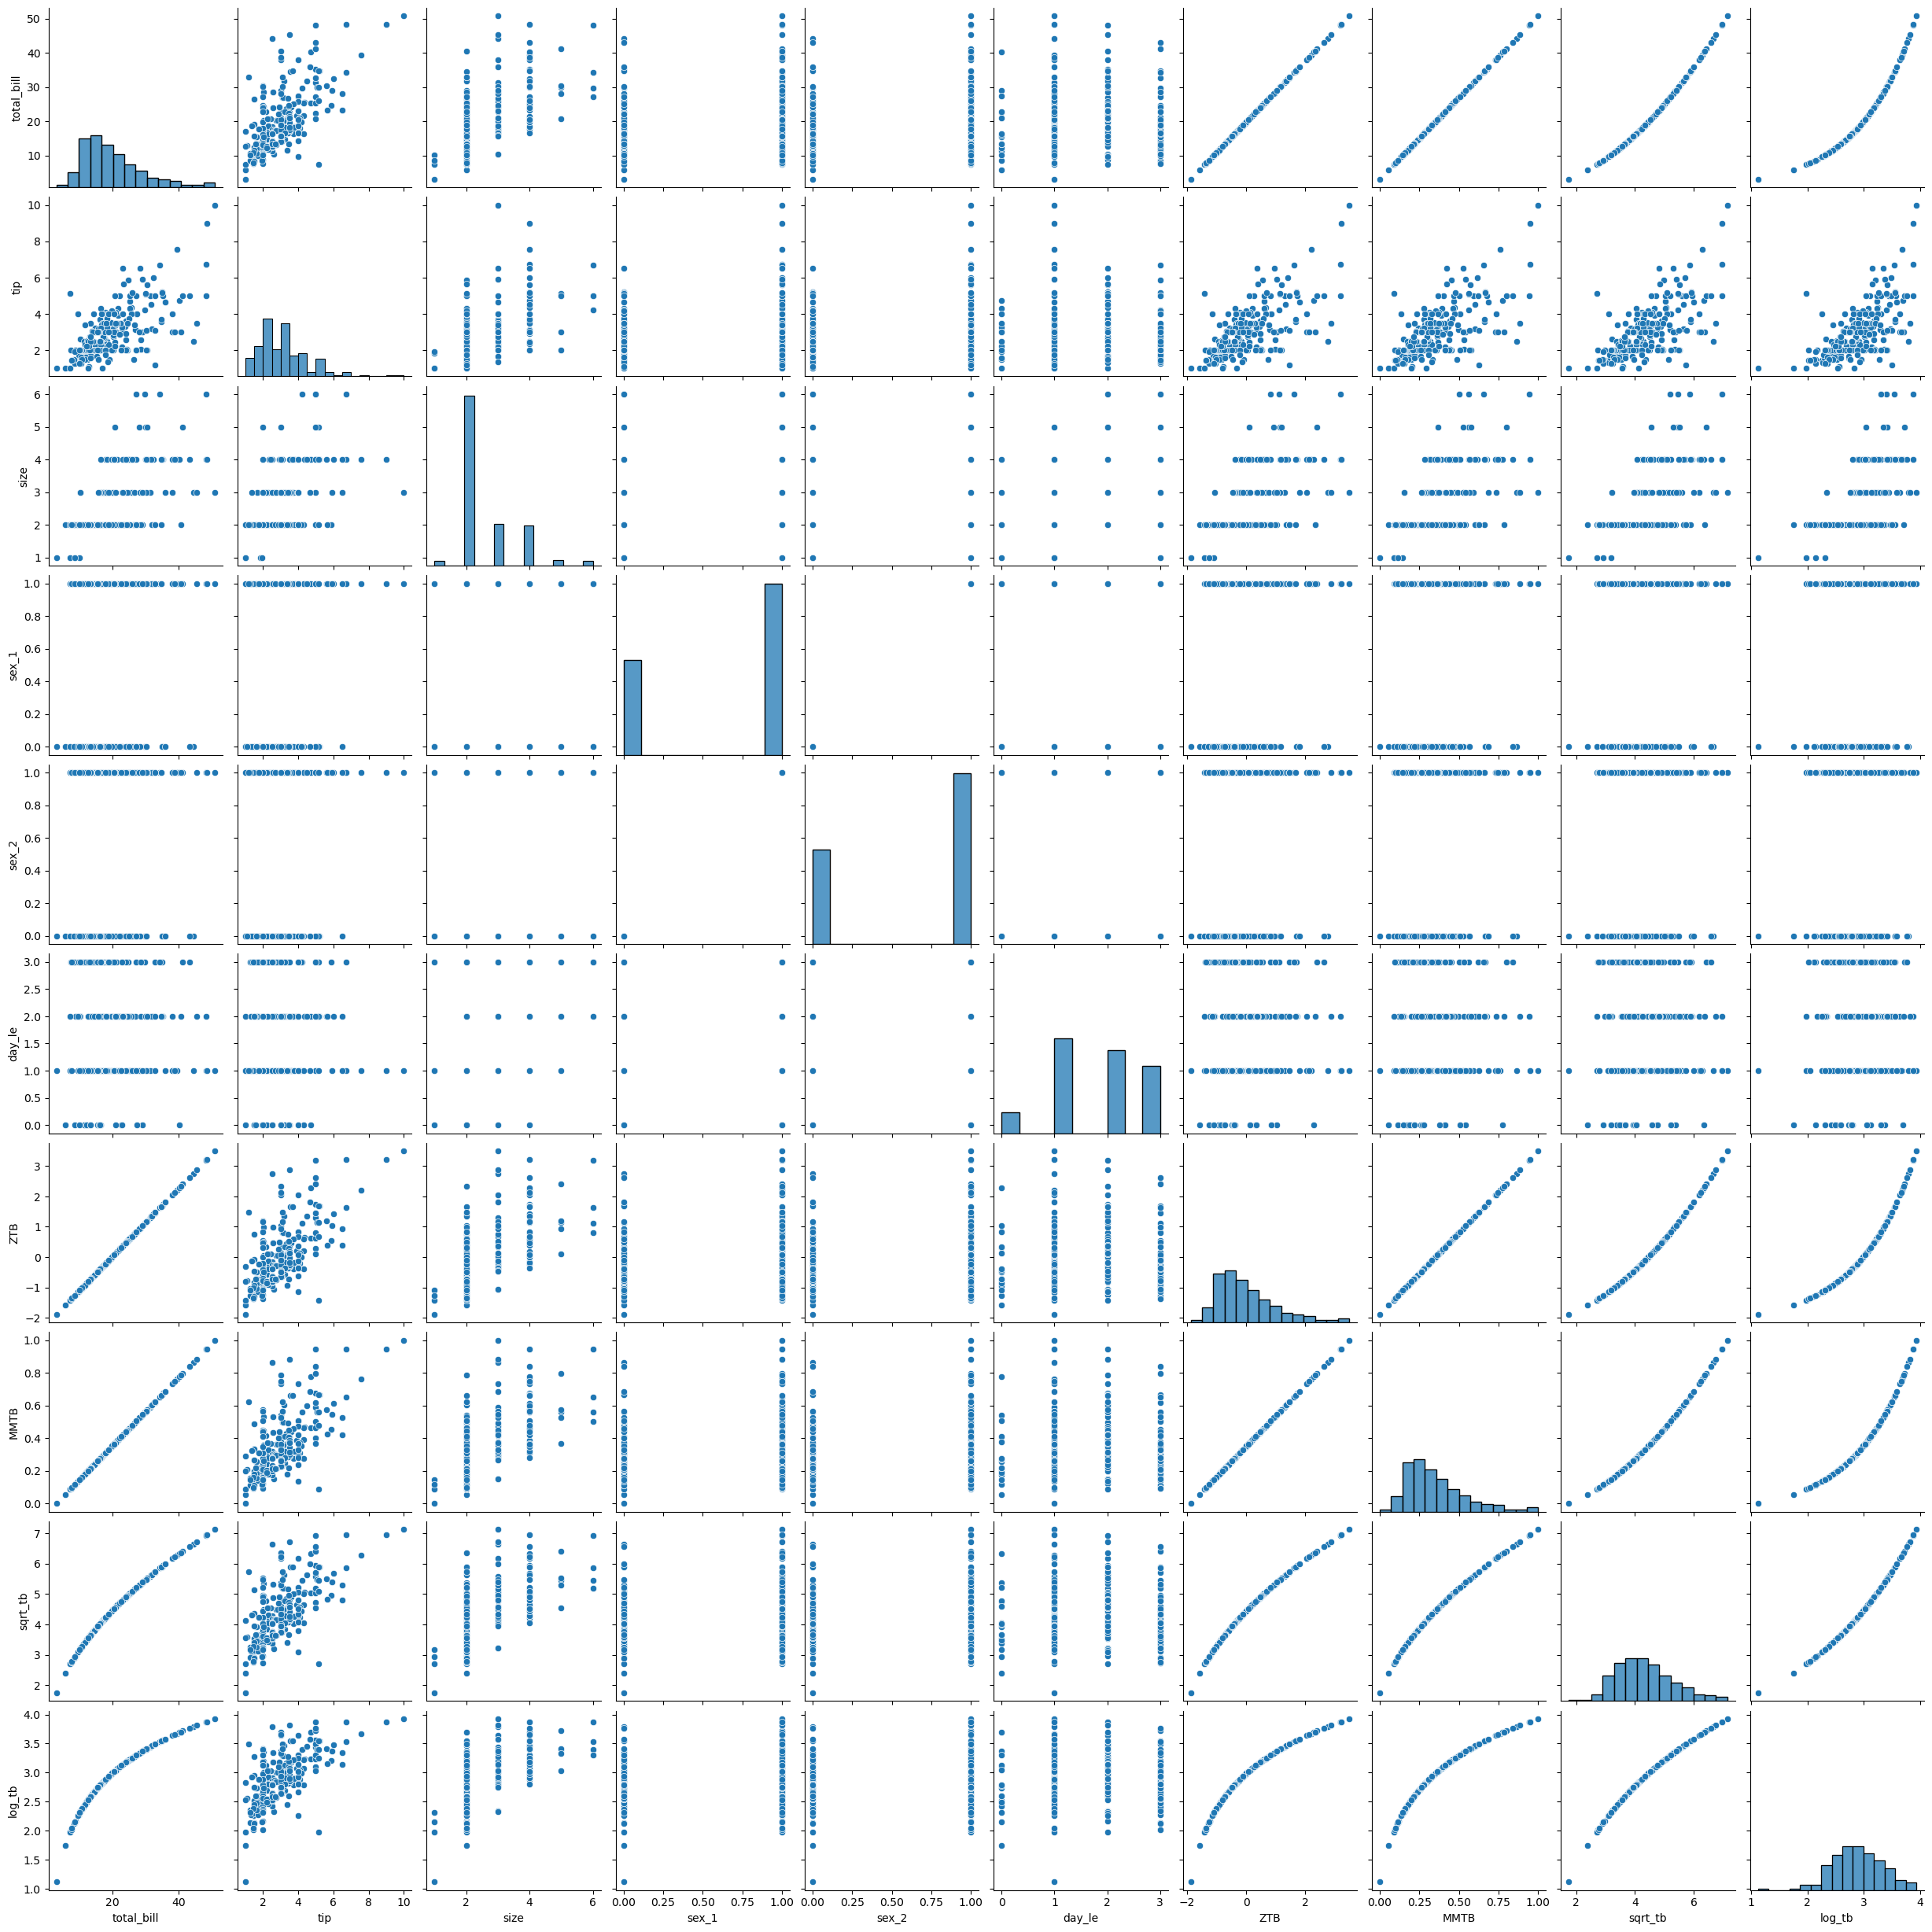

In [83]:
sns.pairplot(df)
plt.show()

## 2.Numerical - categorical graphs

 1.bargraph  
 
 2.Box plot
 
 3.Violinplot
 
 4.Stripplot
 
 5.Swarnplot

# Q1. Compare maximum bill paid on each given day
# Q2. Compare total bill on each day
# Q3. Compare distribution of total bill on each day.

In [84]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,sex_1,sex_2,day_le,ZTB,MMTB,sqrt_tb,log_tb
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2,-0.314711,0.291579,4.121893,2.832625
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2,-1.063235,0.152283,3.215587,2.336020
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2,0.137780,0.375786,4.583667,3.044999
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2,0.438315,0.431713,4.866210,3.164631
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2,0.540745,0.450775,4.958831,3.202340


In [85]:
#Q1
df.groupby(df["day"])["total_bill"].max()

day
Fri     40.17
Sat     50.81
Sun     48.17
Thur    43.11
Name: total_bill, dtype: float64

<Axes: xlabel='day'>

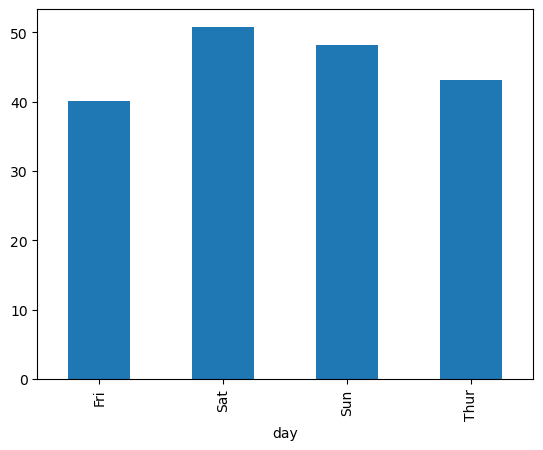

In [86]:
df.groupby(df["day"])["total_bill"].max().plot(kind="bar")

<Axes: xlabel='day', ylabel='total_bill'>

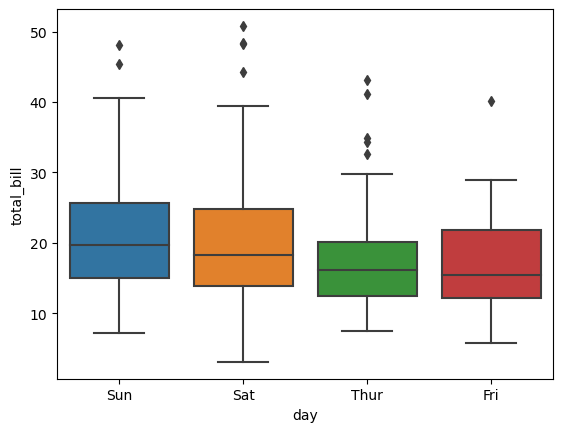

In [87]:
#Q2
sns.boxplot(data=df,x="day",y="total_bill")

<Axes: xlabel='day', ylabel='total_bill'>

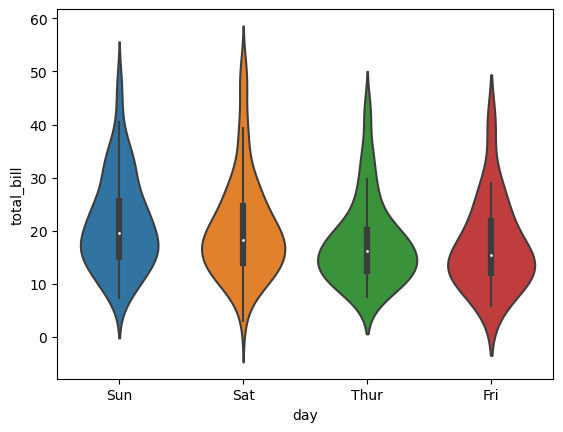

In [88]:
#Q3
sns.violinplot(data=df,x="day",y="total_bill")

<Axes: xlabel='day', ylabel='total_bill'>

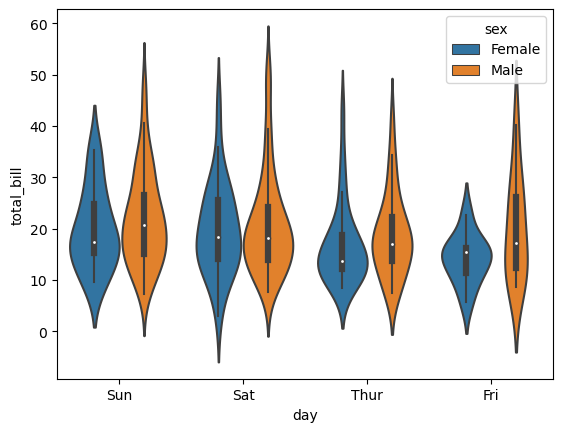

In [89]:
sns.violinplot(data=df,x="day",y="total_bill",hue="sex")

<Axes: xlabel='day', ylabel='total_bill'>

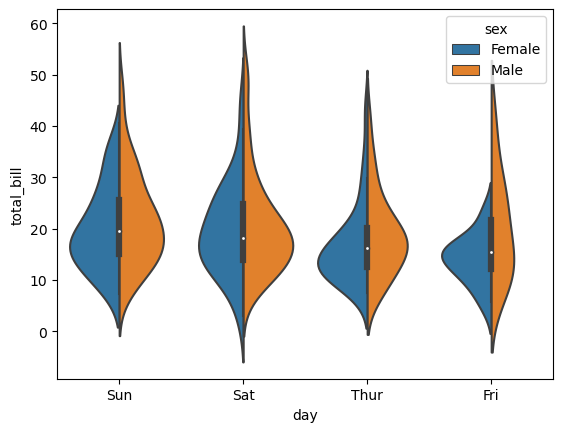

In [90]:
sns.violinplot(data=df,x="day",y="total_bill",hue="sex",split="True")

# Check graphically which day is having highest of total bill around 20$

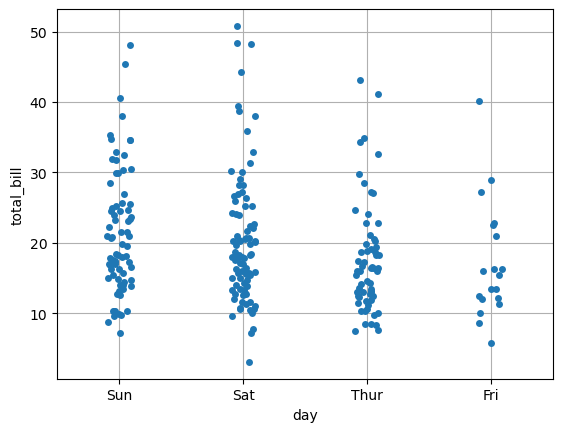

In [196]:
sns.stripplot(data=df,x="day",y="total_bill")
plt.grid()
plt.show()

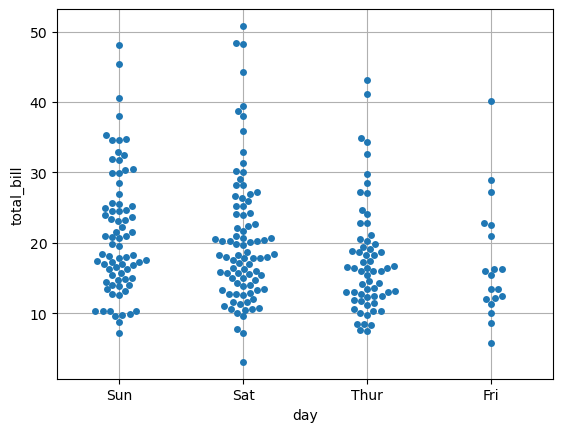

In [197]:
sns.swarmplot(data=df,x="day",y="total_bill")
plt.grid()
plt.show()

# Category to category graphs

 1.side by side bar graph
 
 2.stacked bar graph

In [93]:
pd.crosstab(df["sex"],df["smoker"])

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


<Axes: xlabel='sex'>

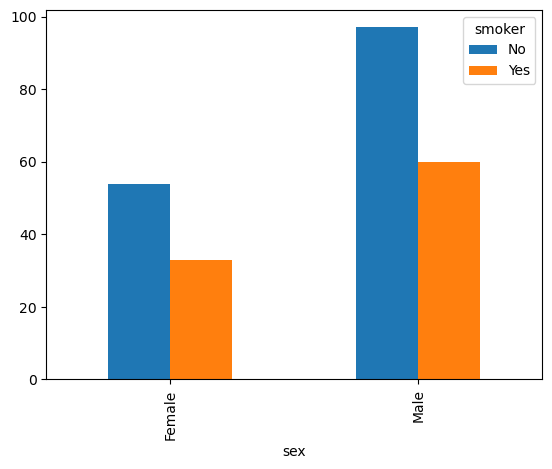

In [94]:
pd.crosstab(df["sex"],df["smoker"]).plot(kind="bar")

<Axes: xlabel='sex', ylabel='count'>

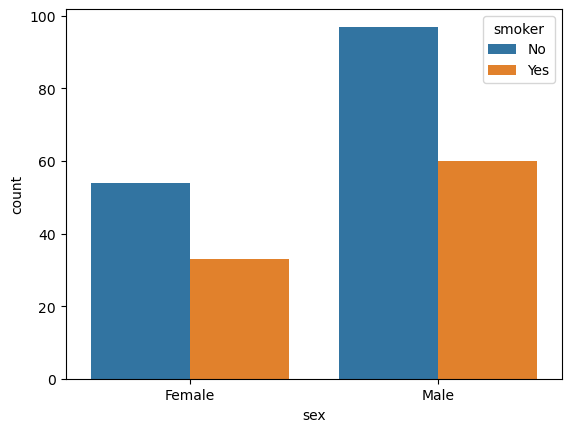

In [95]:
sns.countplot(data=df,x="sex",hue="smoker")

<Axes: xlabel='sex'>

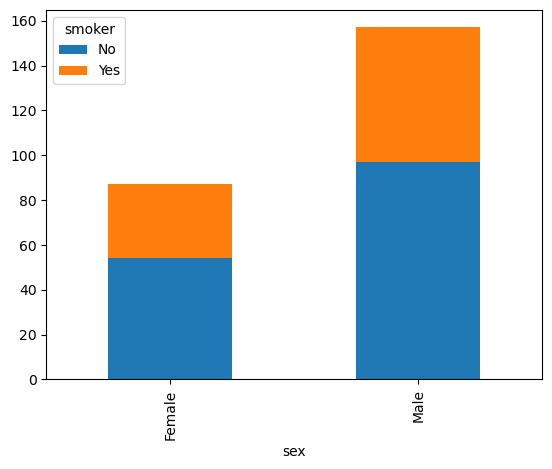

In [96]:
pd.crosstab(df["sex"],df["smoker"]).plot(kind="bar",stacked=True)

# Null value imputation

# Exercise 
   
  

 1.Count of null in columns
   
   2.Percentage of nnull values in columns
   
   3.Decide how to treat those null values
   
   4.Treat them

# Titanic dataset

In [203]:
df1=pd.read_csv("Titanic.csv")

In [204]:
df1.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [205]:
df1.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [206]:
df1.dropna(subset=["embarked"])

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


In [208]:
df1=df1.dropna(subset=["embarked"])

In [210]:
df1.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
alone         0
survived      0
dtype: int64

In [207]:
df1.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [101]:
177/890*100

19.8876404494382

<Axes: xlabel='age', ylabel='Density'>

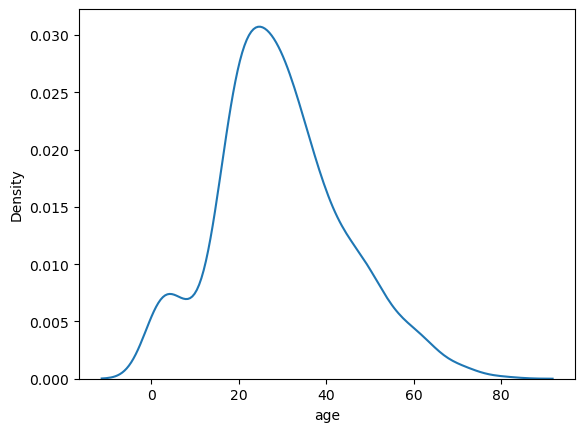

In [102]:
sns.kdeplot(df1,x="age")

# Since AGE column is almost normal we can replace null values with mean

In [103]:
df1["age"].mean()

29.69911764705882

In [104]:
df1["age"]=df1["age"].fillna(df1["age"].mean())

In [105]:
df1.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
class       0
who         0
alone       0
survived    0
dtype: int64

# Outlier treatment or Outlier removal

In [211]:
df = sns.load_dataset("tips")

# Zscore

In [107]:
from scipy.stats import zscore

In [108]:
df["ZTB"] = zscore(df["total_bill"])

In [109]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [110]:
df[df["ZTB"]<-3]

,total_bill,tip,sex,smoker,day,time,size,ZTB


In [111]:
df[df["ZTB"]>3]

,total_bill,tip,sex,smoker,day,time,size,ZTB
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [112]:
df[(df["ZTB"]<-3) | (df["ZTB"]>3)]

,total_bill,tip,sex,smoker,day,time,size,ZTB
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [113]:
df1=df[(df["ZTB"]>-3) & (df["ZTB"]<3)]

In [114]:
df.shape

(244, 8)

In [115]:
df1.shape

(240, 8)

In [116]:
print("skewness of total_bill",df["total_bill"].skew())
print("skewness of ZTB",df1["ZTB"].skew())

skewness of total_bill 1.1332130376158205
skewness of ZTB 0.914851026149


In [117]:
print("kurtosis of total_bill",df["total_bill"].kurt())
print("kurtosis of ZTB",df1["ZTB"].kurt())

kurtosis of total_bill 1.2184840156638854
kurtosis of ZTB 0.5355590055930728


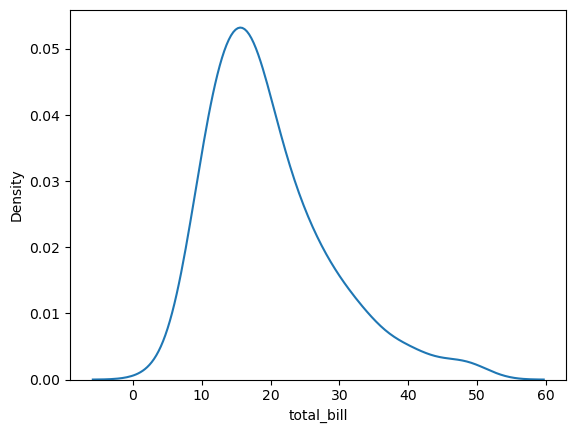

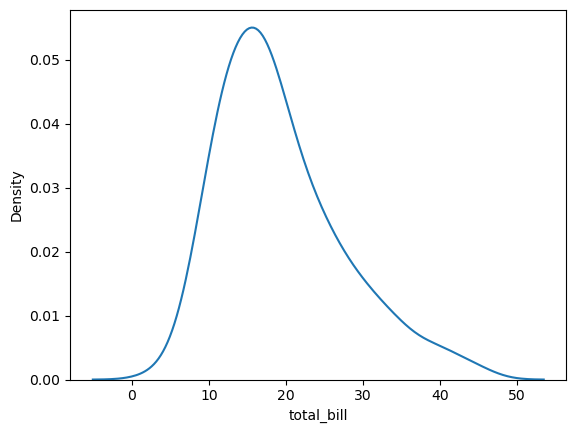

In [118]:
sns.kdeplot(df["total_bill"])
plt.show()
sns.kdeplot(df1["total_bill"])
plt.show()


# Outlier removal using IQR

In [119]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [121]:
Q1=df["total_bill"].quantile(0.25)
Q2=df["total_bill"].quantile(0.50)
Q3=df["total_bill"].quantile(0.75)

In [123]:
IQR = Q3-Q1
print(IQR)

10.779999999999998


In [125]:
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

In [126]:
UL

40.29749999999999

In [127]:
LL

-2.8224999999999945

<Axes: >

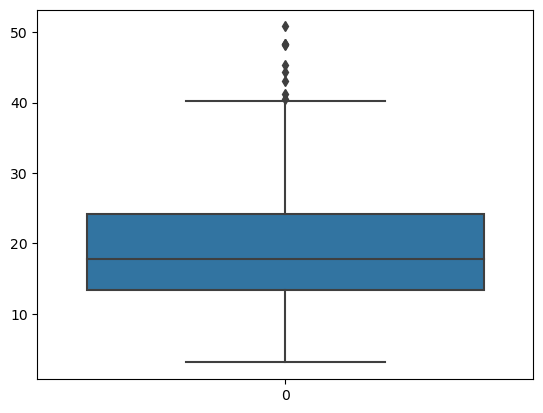

In [130]:
#all the  values above upper lim is ooutlier
sns.boxplot(df["total_bill"])

In [132]:
df[(df["total_bill"]<LL) | (df["total_bill"]>UL)]
#abv 40 in total_bill is outliers

,total_bill,tip,sex,smoker,day,time,size,ZTB
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
102,44.30,2.50,Female,Yes,Sat,Dinner,3,2.759302
142,41.19,5.00,Male,No,Thur,Lunch,5,2.409241
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
182,45.35,3.50,Male,Yes,Sun,Dinner,3,2.877490
184,40.55,3.00,Male,Yes,Sun,Dinner,2,2.337202
197,43.11,5.00,Female,Yes,Thur,Lunch,4,2.625356
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [133]:
len(df[(df["total_bill"]<LL) | (df["total_bill"]>UL)])

9

In [137]:
#This is to remove this outlier from the column
df2=df[(df["total_bill"]>LL) & (df["total_bill"]<UL)]
len(df2)

235

In [138]:
print("skewness of total_bill",df["total_bill"].skew())
print("skewness of IQR",df2["total_bill"].skew())

skewness of total_bill 1.1332130376158205
skewness of IQR 0.7255976389840281


In [143]:
print("kurutosis of total_bill",df["total_bill"].kurt())
print("kurutosis of IQR",df2["total_bill"].kurt())

kurutosis of total_bill 1.2184840156638854
kurutosis of IQR 0.050898514819063934


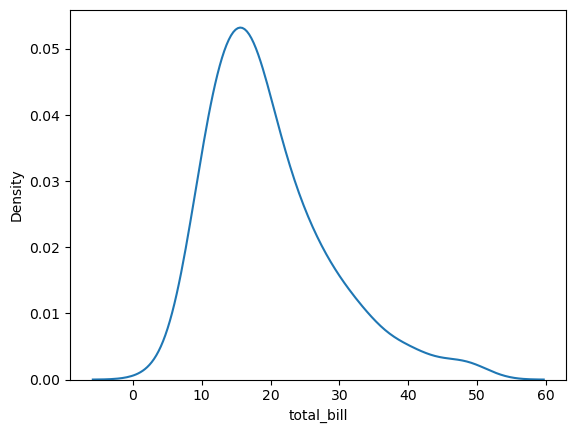

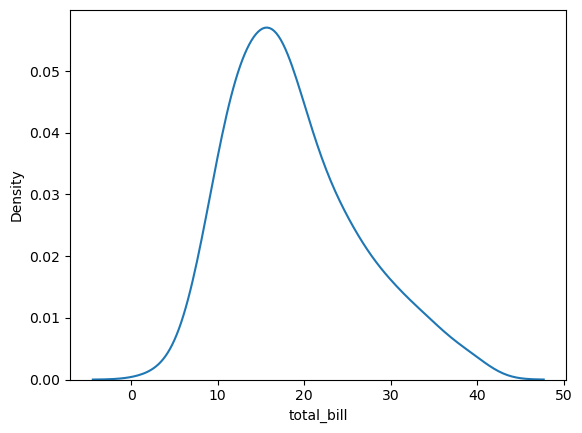

In [144]:
sns.kdeplot(df["total_bill"])
plt.show()
sns.kdeplot(df2["total_bill"])
plt.show()